# Librerías y acercamiento inicial al dataset

Links de referencia

https://www.cpsc.gov/es/Safety-Education/Centro-de-informacion-seguridad/Carbon-Monoxide-Info-Center-Spanish/Monoxido-de-Carbono---Preguntas-y-Respuestas

https://www.kite.com/python/answers/how-to-change-the-axis-scales-of-a-plot-by-a-factor-in-matplotlib-in-python

https://www.buenosaires.gob.ar/agenciaambiental/controlambiental/estacion-parque-centenario

CO Monóxido de Carbono (en ppm - partes por millón) - Promedio móvil 8 horas - promedio de las 8 horas anteriores
NO2 Dióxido de Nitrógeno (en ppb - part per billon  - miles de millones) - Promedio horario correspondiente a los 60 minutos anteriores.
PM10 Material Particulado respirable menor a 10 micrones (en µg/m3 â microgramo por metro cúbico) - Promedio móvil 24  horas - promedio 24 horas anteriores

NO2 - 40 μg/m3 de media anual - 200 μg/m3 de media en 1h
Partículas gruesas (PM10) - 20 μg/m3 de media anual - 50 μg/m3 de media en 24h

In [18]:
#Importamos las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

### Creación del dataframe y primer acercamiento

In [19]:
#Creamos el dataframe con el archivo CSV, asignamos la columna de fechas como índice y la convertimos en fechas

calidad_aire = pd.read_csv('calidad-de-aire-2018.csv', index_col='fecha', parse_dates=True)

In [20]:
#Imprimimos las primeras 25 columnas para ver el primer día completo

calidad_aire.head(25)

,hora,co_centenario,no2_centenario,pm10_centenario,co_cordoba,no2_cordoba,pm10_cordoba,co_la_boca,no2_la_boca,pm10_la_boca
fecha,,,,,,,,,,
2018-01-01,1,0.43,9,25,0.47,14,24,0.37,28,23
2018-01-01,2,0.44,11,27,0.53,20,24,0.39,28,26
2018-01-01,3,0.46,13,30,0.59,21,26,0.40,29,29
2018-01-01,4,0.47,14,32,0.65,20,28,0.41,25,30
2018-01-01,5,0.47,12,32,0.71,17,28,0.41,16,31
2018-01-01,6,0.44,12,33,0.74,16,29,0.39,12,32
2018-01-01,7,0.41,9,33,0.77,15,29,0.37,16,32
2018-01-01,8,0.37,8,33,0.79,14,29,0.34,14,32
2018-01-01,9,0.35,s/d,33,0.78,16,29,0.32,12,32


In [21]:
#Imprimimos las últimas 25 columnas para ver que sea el año completo

calidad_aire.tail(25)

,hora,co_centenario,no2_centenario,pm10_centenario,co_cordoba,no2_cordoba,pm10_cordoba,co_la_boca,no2_la_boca,pm10_la_boca
fecha,,,,,,,,,,
2018-12-30,24,0.34,10,13,0.69,11,s/d,0.32,10,13
2018-12-31,1,0.35,10,14,0.68,12,s/d,0.34,10,13
2018-12-31,2,0.34,9,14,0.67,10,s/d,0.35,10,13
2018-12-31,3,0.33,7,14,0.63,9,s/d,0.36,11,13
2018-12-31,4,0.30,5,14,0.61,9,s/d,0.35,10,13
2018-12-31,5,0.28,6,14,0.57,9,s/d,0.35,10,14
2018-12-31,6,0.25,7,15,0.54,11,s/d,0.35,14,14
2018-12-31,7,0.23,10,15,0.53,13,s/d,0.34,15,14
2018-12-31,8,0.22,8,15,0.53,12,s/d,0.35,14,15


In [22]:
#Con shape podemos ver que tenemos visualizadas todas las columnas. Ya sabemos que tenemos 10 más el Index
#Sin embargo, detecto que deberíamos tener 8760 filas, ya que 365 días * 24 horas da ese valor. Es decir, vamos a tener 
#que averiguar dónde faltan observaciones

calidad_aire.shape



(8712, 10)

### Imputación de valores faltantes y conversión a numéricos

In [23]:
#Para saber dónde nos faltan observaciones, contamos los valores por fecha (es decir, por índice). Vemos que el 6 y 7 de 
#julio y el 16 y 17 de diciembre tenemos menos mediciones

calidad_aire.index.value_counts()

2018-05-21    24
2018-05-15    24
2018-03-19    24
2018-12-03    24
2018-06-28    24
              ..
2018-08-30    24
2018-07-07    12
2018-12-17    12
2018-07-06    12
2018-12-16    12
Name: fecha, Length: 365, dtype: int64

In [24]:
#Seleccionamos por índice cada uno de los días para analizarlos en particular

seis_de_julio = calidad_aire.loc['2018-07-06']
print(seis_de_julio)

#Observamos que desde el 6 de julio a las 13hs hasta el 7 de julio a las 12 hs se interrumpieron las mediciones

siete_de_julio = calidad_aire.loc['2018-07-07']
print(siete_de_julio)

dieciseis_de_diciembre = calidad_aire.loc['2018-12-16']
print(dieciseis_de_diciembre)

#Lo mismo ocurrió entre el 16 y 17 de diciembre. Tal vez son días en los que durante 24 horas se realizan tareas de
#mantenimniento en los instrumentos de medición. Cuando grafiquemos esos días o esos meses vamos a tener valores faltantes

diecisiete_de_diciembre = calidad_aire.loc['2018-12-17']
print(diecisiete_de_diciembre)

            hora co_centenario no2_centenario pm10_centenario co_cordoba  \
fecha                                                                      
2018-07-06     1          0.44              9              19       0.22   
2018-07-06     2          0.43              7              19       0.21   
2018-07-06     3          0.40              6              19       0.19   
2018-07-06     4          0.37              5              19       0.17   
2018-07-06     5          0.34              6              19       0.15   
2018-07-06     6          0.31              8              19       0.14   
2018-07-06     7          0.30             12              19       0.14   
2018-07-06     8          0.30             17              18       0.14   
2018-07-06     9          0.31             19              18       0.15   
2018-07-06    10          0.32             18              17       0.15   
2018-07-06    11          0.33             17              17       0.16   
2018-07-06  

In [25]:
#Efectivamente, tenemos muchos valores s/d, es decir, sin datos. Sin embargo, pandas no interpreta el s/d, así que hay que
#convertirlo en valores nulos con la función np.nan de NumPy

calidad_aire.replace('s/d', np.nan, inplace=True)

In [26]:
#Vemos que hay valores s/d en la columna pm10_cordoba, chequeamos si en alguna otra hay para saber de las 8712 observaciones
#que deberíamos tener cuántas tenemos de verdad. Observamos que NO2 en Córdoba es a la que más observaciones le faltan,
#un 20% de las observaciones.

calidad_aire.isna().sum()

hora                  0
co_centenario       274
no2_centenario      633
pm10_centenario     409
co_cordoba          676
no2_cordoba        1762
pm10_cordoba       1035
co_la_boca         1100
no2_la_boca         813
pm10_la_boca        506
dtype: int64

In [27]:
#Convertimos la data a valores numéricos (por ahora son strings) para poder operar con operaciones matemáticas.

cols = ['co_centenario', 'co_cordoba', 'co_la_boca', 'no2_centenario', 'no2_cordoba', 'no2_la_boca', 'pm10_centenario', 'pm10_cordoba', 'pm10_la_boca']

calidad_aire[cols] = calidad_aire[cols].apply(pd.to_numeric, errors='coerce', axis=1)

### Visualización de distribuciones

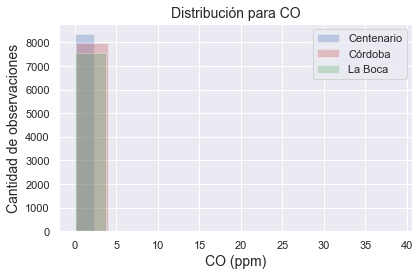

In [28]:
#Intentamos graficar un histograma para analizar la distribución de la data. Sin embargo, evidentemente hay outliers muy
#grandes y este gráfico no nos sirve. Sin embargo, detectamos que la mayoría de los valores están entre 0 y 5.

sns.set()
plt.hist(calidad_aire['co_centenario'], alpha=0.3, color='b', label='Centenario', histtype='barstacked')
plt.hist(calidad_aire['co_cordoba'], alpha=0.3, color='r', label='Córdoba', histtype='barstacked')
plt.hist(calidad_aire['co_la_boca'], alpha=0.3, color='g', label='La Boca', histtype='barstacked')

plt.xlabel('CO (ppm)', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución para CO', fontdict={'fontsize': 14}, loc='center')

plt.tight_layout()
plt.legend()
plt.show()

np.warnings.filterwarnings('ignore') #Esto es porque si no da un error que está intentando graficar con NaN

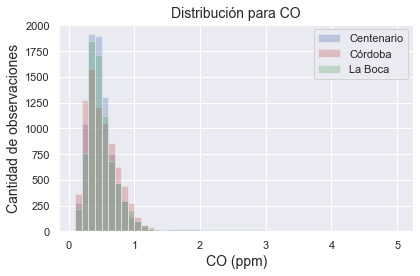

In [29]:
#Analizando más en detalle, vemos que los valores normales están entre 0 y 1.5.

bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5]
sns.set()
plt.hist(calidad_aire['co_centenario'], bins=bins, alpha=0.3, color='b', label='Centenario', histtype='barstacked')
plt.hist(calidad_aire['co_cordoba'], bins=bins, alpha=0.3, color='r', label='Córdoba', histtype='barstacked')
plt.hist(calidad_aire['co_la_boca'], bins=bins, alpha=0.3, color='g', label='La Boca', histtype='barstacked')

plt.xlabel('CO (ppm)', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución para CO', fontdict={'fontsize': 14}, loc='center')

plt.tight_layout()
plt.legend()
plt.show()

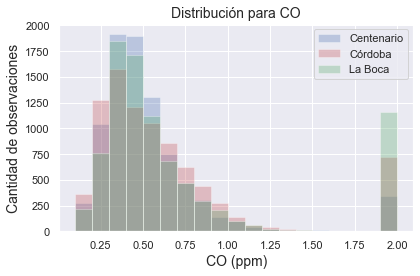

In [30]:
#Ajustamos entonces la escala. Como estamos ajustando los bins a valores entre 0.1 y 2, todos los outliers quedan 
#concentrados en ese valor.

bins = np.linspace(0.1, 2, num=20, dtype=list)

sns.set()
plt.hist(calidad_aire['co_centenario'], bins=bins, alpha=0.3, color='b', label='Centenario', histtype='barstacked')
plt.hist(calidad_aire['co_cordoba'], bins=bins, alpha=0.3, color='r', label='Córdoba', histtype='barstacked')
plt.hist(calidad_aire['co_la_boca'], bins=bins, alpha=0.3, color='g', label='La Boca', histtype='barstacked')

plt.xlabel('CO (ppm)', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución para CO', fontdict={'fontsize': 14}, loc='center')

plt.tight_layout()
plt.legend()
plt.show()

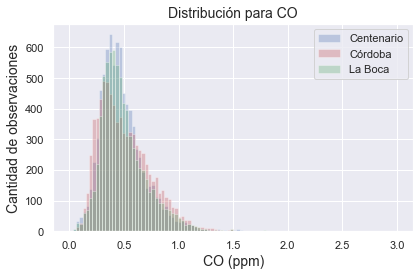

In [31]:
#El error que da es porque tiene que graficar con valores NaN pero igual nos permite ver la distribución

sns.set()
fig, ax = plt.subplots()
ax.hist(calidad_aire['co_centenario'], bins=100, alpha=0.3, range=[0, 3], color='b', label='Centenario', histtype='barstacked')
ax.hist(calidad_aire['co_cordoba'], bins=100, alpha=0.3, range=[0, 3], color='r', label='Córdoba', histtype='barstacked')
ax.hist(calidad_aire['co_la_boca'], bins=100, alpha=0.3, range=[0, 3], color='g', label='La Boca', histtype='barstacked')

plt.xlabel('CO (ppm)', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución para CO', fontdict={'fontsize': 14}, loc='center')

plt.tight_layout()
ax.legend()
plt.show()

In [32]:
#Vemos la cantidad de outiiers para saber si son muchos (los valores superiores a 2, según lo que vimos de la distribución)
#para poder observar la cantidad de outliers. Vemos que en total son 

o = calidad_aire[calidad_aire['co_centenario'] >= 2]
u = calidad_aire[calidad_aire['co_cordoba'] >= 2]
t = calidad_aire[calidad_aire['co_la_boca'] >= 2]

print(o.shape)
print(u.shape)
print(t.shape)

(65, 10)
(48, 10)
(58, 10)


In [33]:
#Buscamos las ubicaciones de los outliers para ver si están distribuídos aleatoriamente o son eventos concentrados en días
#particulares. efectivamente, detectamos que el 16-02-2018 ocurrió algo que aumentó el monóxido de carbono durante
#aproximadamente un día. Lo mismo ocurrió el 31-07-2018.
#El 18 de febrero tenemos esta noticia, así que lo más probable es que el aumento excepcional de monóxido de carbono se
#trate de esto: https://telefenoticias.com.ar/actualidad/buenos-aires-se-lleno-de-humo-por-la-quema-de-pastizales/
#Para el 31-07-2018 sólo encuentro registros de un incendio en Córdoba. Sin embargo, al tratarse de valores similares
#podemos asegurar con cierto grado de certeza de que se trata de un fenómeno excepcional similar, motivos por los cuales
#para evaluar promedios conviene recortar estos outliers.

o

,hora,co_centenario,no2_centenario,pm10_centenario,co_cordoba,no2_cordoba,pm10_cordoba,co_la_boca,no2_la_boca,pm10_la_boca
fecha,,,,,,,,,,
2018-02-16,13,19.04,12.0,19.0,19.44,23.0,19.0,34.91,20.0,35.0
2018-02-16,14,18.88,12.0,19.0,19.53,17.0,20.0,34.96,24.0,35.0
2018-02-16,15,18.83,17.0,19.0,19.74,25.0,20.0,34.92,26.0,35.0
2018-02-16,16,19.08,23.0,19.0,19.50,21.0,19.0,35.09,28.0,35.0
2018-02-16,17,19.17,17.0,19.0,19.46,21.0,19.0,35.59,30.0,36.0
...,...,...,...,...,...,...,...,...,...,...
2018-08-01,8,22.29,22.0,22.0,37.06,10.0,37.0,35.13,33.0,35.0
2018-08-01,9,21.92,24.0,22.0,36.20,9.0,36.0,35.86,33.0,36.0
2018-08-01,10,21.13,18.0,21.0,35.01,8.0,35.0,36.55,26.0,37.0


### Tratamiento de outliers

In [34]:
#Vamos a calcular los desvíos de cada columna para ver si tiene muchos outliers. Para eso, calculamos la asimetría
#estadística. Vemos que no hay valores negativos por lo que se considera una asimetría positiva. Esto quiere decir que los
#outliers más significativos se encuentran en valores elevados. Pero además podemos ver que las columnas de CO son las que
#más tienden a tener outliers (y muy significativos).

for col in cols:
    skew = calidad_aire[cols].skew()
    
skew

co_centenario      12.802513
co_cordoba         14.120277
co_la_boca         12.499491
no2_centenario      0.616105
no2_cordoba         0.949680
no2_la_boca         0.829890
pm10_centenario     0.907184
pm10_cordoba        0.677525
pm10_la_boca        1.355079
dtype: float64

In [35]:
#Hacemos la prueba del percentil más alto para ver el 1% de data más extremo. Vemos que el 99% de los valores se encuentra
#es igual o menos a 1.53. Podemos establecer como 2 un valor razonable para hacer el corte de valores extremos.

colsco = ['co_centenario', 'co_cordoba', 'co_la_boca']

for col in colsco:
    print(calidad_aire[col].quantile(0.99))

1.53
1.33
1.4889000000000032


In [36]:
#Detectemos cuáles son los outliers. Habiendo visto la distribución de la data, podemos intentar eliminar los valores muy
#extremos. En este caso, vemos los superiores a 2. Sin embargo, los que verdaderamente afectan la data son los muy altos.
#Vemos un quiebre claro de 3.19 a 18.5. En este caso, consideramos los outliers los valores superiores a 3.2

outliers_cent = sorted(i for i in calidad_aire['co_centenario'] if i > 2)
outliers_cent

[2.04,
 2.06,
 2.25,
 2.32,
 2.4,
 2.51,
 2.6,
 2.77,
 2.79,
 2.82,
 2.92,
 3.01,
 3.06,
 3.1,
 3.12,
 3.14,
 3.19,
 18.5,
 18.79,
 18.83,
 18.83,
 18.88,
 18.96,
 18.96,
 19.0,
 19.0,
 19.04,
 19.08,
 19.13,
 19.17,
 19.17,
 19.17,
 19.17,
 19.17,
 19.21,
 19.25,
 19.25,
 19.25,
 19.29,
 19.29,
 19.38,
 19.46,
 19.75,
 21.13,
 21.58,
 21.75,
 21.79,
 21.83,
 21.88,
 21.92,
 22.17,
 22.29,
 22.33,
 22.33,
 22.33,
 22.38,
 22.42,
 22.42,
 22.42,
 22.46,
 22.5,
 22.54,
 22.58,
 22.63,
 22.67]

In [37]:
#Repetimos el proceso para Córdoba

outliers_cor = sorted(i for i in calidad_aire['co_cordoba'] if i > 2)
outliers_cor

[19.19,
 19.39,
 19.41,
 19.44,
 19.46,
 19.5,
 19.53,
 19.55,
 19.56,
 19.66,
 19.72,
 19.74,
 19.83,
 19.84,
 19.96,
 20.04,
 20.07,
 20.07,
 20.18,
 20.2,
 20.25,
 20.28,
 20.3,
 20.36,
 32.23,
 33.37,
 35.01,
 35.09,
 35.1,
 35.81,
 35.89,
 35.93,
 36.03,
 36.15,
 36.19,
 36.2,
 36.3,
 36.58,
 36.74,
 36.82,
 36.85,
 37.06,
 37.3,
 37.53,
 38.23,
 38.29,
 38.45,
 38.71]

In [38]:
#Y para La Boca

outliers_lb = sorted(i for i in calidad_aire['co_la_boca'] if i > 2)
outliers_lb

[2.06,
 2.07,
 2.43,
 2.49,
 2.57,
 2.58,
 2.64,
 2.8,
 2.82,
 2.9,
 25.07,
 25.3,
 25.35,
 25.45,
 25.83,
 26.45,
 27.92,
 28.79,
 29.41,
 29.8,
 30.1,
 30.88,
 30.96,
 31.03,
 31.13,
 31.42,
 31.54,
 31.55,
 31.58,
 31.69,
 31.77,
 31.82,
 31.89,
 31.98,
 32.07,
 32.08,
 32.14,
 32.29,
 32.38,
 32.47,
 32.97,
 33.19,
 33.41,
 33.6,
 34.14,
 34.17,
 34.91,
 34.92,
 34.96,
 35.09,
 35.11,
 35.13,
 35.55,
 35.59,
 35.86,
 36.55,
 36.67,
 37.09]

In [39]:
#Reemplazamos los valores por el máximo estipulado

for col in colsco:
    calidad_aire[col] = np.where(calidad_aire[col] > 2, 2, calidad_aire[col])


In [40]:
#Volvemos a calcular. Vemos que sacando unos pocos valores la data sigue siendo positivamente asimétrica (y bastante)
#pero una fracción de lo que era antes.

for col in cols:
    skew = calidad_aire[cols].skew()
    
skew

co_centenario      2.445520
co_cordoba         1.609364
co_la_boca         2.342507
no2_centenario     0.616105
no2_cordoba        0.949680
no2_la_boca        0.829890
pm10_centenario    0.907184
pm10_cordoba       0.677525
pm10_la_boca       1.355079
dtype: float64

### Creación de los dataframes para trabajar los datos

In [41]:
#En primera instancia, vamos a evaluar si estacionalmente la concentración de sustancias cambia significativamente. Con este
#fin, vamos a separar en períodos de tres meses que se ajustan aproximadamente a las estaciones del año.

verano = calidad_aire.loc['2018-01-01':'2018-03-31'].copy()
otono = calidad_aire.loc['2018-04-01':'2018-06-30'].copy()
invierno = calidad_aire.loc['2018-07-01':'2018-09-30'].copy()
primavera =calidad_aire.loc['2018-10-01':'2018-12-31'].copy()

In [42]:
#Habiendo creado los cuatro dataframes, observamos la media, la mediana y los valores mínimos y máximos de cada columna.

dataframes = [verano, otono, invierno, primavera]
cols = ['co_centenario', 'co_cordoba', 'co_la_boca', 'no2_centenario', 'no2_cordoba', 'no2_la_boca', 'pm10_centenario', 'pm10_cordoba', 'pm10_la_boca']


for df in dataframes:
    for col in cols:
        print(calidad_aire[col].agg([np.mean, np.median, min, max]))

mean      0.490839
median    0.440000
min       0.030000
max       2.000000
Name: co_centenario, dtype: float64
mean      0.510347
median    0.460000
min       0.070000
max       2.000000
Name: co_cordoba, dtype: float64
mean      0.502133
median    0.450000
min       0.040000
max       2.000000
Name: co_la_boca, dtype: float64
mean      16.698478
median    16.000000
min        2.000000
max       53.000000
Name: no2_centenario, dtype: float64
mean      17.251511
median    15.000000
min        2.000000
max       66.000000
Name: no2_cordoba, dtype: float64
mean      21.021904
median    20.000000
min        0.000000
max       92.000000
Name: no2_la_boca, dtype: float64
mean      21.754185
median    20.000000
min        6.000000
max       55.000000
Name: pm10_centenario, dtype: float64
mean      25.110851
median    24.000000
min        7.000000
max       59.000000
Name: pm10_cordoba, dtype: float64
mean       31.41884
median     28.00000
min         7.00000
max       120.00000
Name: pm10_l

In [43]:
#Visualizamos los valores nulos de cada nuevo dataframe.

verano.isna().sum()

hora                 0
co_centenario      188
no2_centenario     287
pm10_centenario    353
co_cordoba         177
no2_cordoba        194
pm10_cordoba       422
co_la_boca          85
no2_la_boca        346
pm10_la_boca         0
dtype: int64

In [44]:
otono.isna().sum()

hora                 0
co_centenario        0
no2_centenario      25
pm10_centenario      0
co_cordoba          16
no2_cordoba        507
pm10_cordoba       405
co_la_boca         393
no2_la_boca         97
pm10_la_boca        60
dtype: int64

In [45]:
invierno.isna().sum()

hora                 0
co_centenario       18
no2_centenario      18
pm10_centenario     56
co_cordoba         202
no2_cordoba        784
pm10_cordoba       150
co_la_boca          71
no2_la_boca         71
pm10_la_boca        94
dtype: int64

In [46]:
primavera.isna().sum()

hora                 0
co_centenario       68
no2_centenario     303
pm10_centenario      0
co_cordoba         281
no2_cordoba        277
pm10_cordoba        58
co_la_boca         551
no2_la_boca        300
pm10_la_boca       352
dtype: int64

In [47]:
#Ahora que reemplazamos los outliers, imputamos los valores faltantes por la mediana estacional para poder observar las
#distintas concentraciones en los dataframes por estación.

for df in dataframes:
    for col in cols:
        df[col].fillna(df[col].mean(), inplace=True)

In [48]:
#for col in cols:
 #   verano[col].fillna(verano[col].median(), inplace=True)
    
#for col in cols:
 #   otono[col].fillna(otono[col].median(), inplace=True)
    
#for col in cols:
#    invierno[col].fillna(invierno[col].median(), inplace=True)
    
#for col in cols:
 #   primavera[col].fillna(primavera[col].median(), inplace=True)

In [49]:
#Agregamos una columna que sea el promedio de concentración de cada partícula independeientemente del lugar de medición

for df in dataframes:
    df['co_promedio'] = df[['co_centenario','co_cordoba','co_la_boca']].mean(axis=1,skipna=True)

In [50]:
#Lo hacemos para el NO2.

for df in dataframes:
    df['no2_promedio'] = df[['no2_centenario','no2_cordoba','no2_la_boca']].mean(axis=1,skipna=True)

In [51]:
#Y para el PM10.

for df in dataframes:
    df['pm10_promedio'] = df[['pm10_centenario','pm10_cordoba','pm10_la_boca']].mean(axis=1,skipna=True)

In [52]:
#Por último, creamos un nuevo dataframe con las tres columnas promedio, la hora y las fechas como índice y las renombramos.

verano_promedio = pd.concat([verano['hora'], verano['co_promedio'], verano['no2_promedio'], verano['pm10_promedio']], axis=1, keys=['Hora', 'CO promedio', 'NO2 promedio', 'PM10 promedio'])
otono_promedio = pd.concat([otono['hora'], otono['co_promedio'], otono['no2_promedio'], otono['pm10_promedio']], axis=1, keys=['Hora', 'CO promedio', 'NO2 promedio', 'PM10 promedio'])
invierno_promedio = pd.concat([invierno['hora'], invierno['co_promedio'], invierno['no2_promedio'], invierno['pm10_promedio']], axis=1, keys=['Hora', 'CO promedio', 'NO2 promedio', 'PM10 promedio'])
primavera_promedio = pd.concat([primavera['hora'], primavera['co_promedio'], primavera['no2_promedio'], primavera['pm10_promedio']], axis=1, keys=['Hora', 'CO promedio', 'NO2 promedio', 'PM10 promedio'])

In [53]:
#---------------------------------------------#
#VISUALIZACIÓN DE DISTRIBUCIONES Y ANÁLISIS DE LA DATA
#---------------------------------------------#

In [54]:
### MONÓXIDO DE CARBONO ###

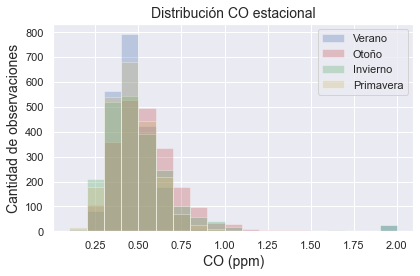

In [55]:
#binsco = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]

binsco = np.linspace(0.1, 2, num=20, dtype=list)

sns.set()
plt.hist(verano_promedio['CO promedio'], bins=binsco, alpha=0.3, color='b', label='Verano', histtype='barstacked')
plt.hist(otono_promedio['CO promedio'], bins=binsco, alpha=0.3, color='r', label='Otoño', histtype='barstacked')
plt.hist(invierno_promedio['CO promedio'], bins=binsco, alpha=0.3, color='g', label='Invierno', histtype='barstacked')
plt.hist(primavera_promedio['CO promedio'], bins=binsco, alpha=0.3, color='y', label='Primavera', histtype='barstacked')

plt.xlabel('CO (ppm)', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución CO estacional', fontdict={'fontsize': 14}, loc='center')

plt.tight_layout()
plt.legend()
plt.show()

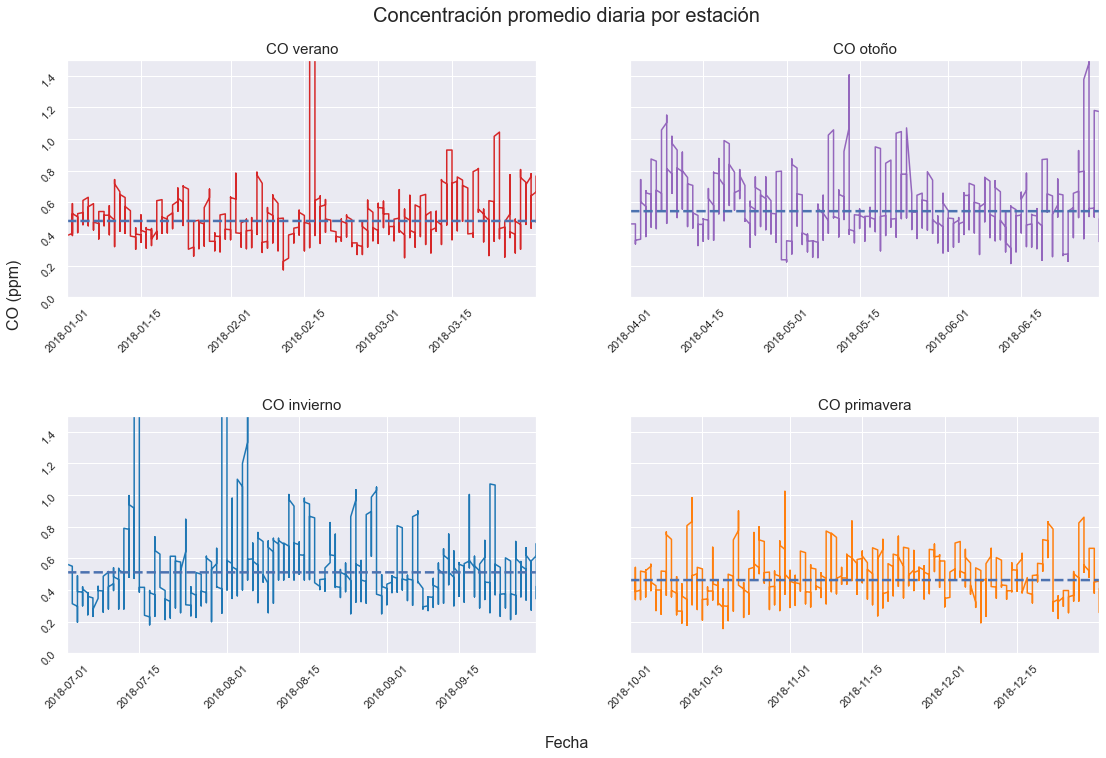

In [56]:
verano_promedio['CO mean'] = verano_promedio['CO promedio'].mean()
otono_promedio['CO mean'] = otono_promedio['CO promedio'].mean()
invierno_promedio['CO mean'] = invierno_promedio['CO promedio'].mean()
primavera_promedio['CO mean'] = primavera_promedio['CO promedio'].mean()

fig, ax = plt.subplots(2, 2, sharey=True)
data_line1 = ax[0, 0].plot(verano_promedio.index, verano_promedio['CO promedio'], 'tab:red')
mean_line1 = ax[0, 0].plot(verano_promedio.index, verano_promedio['CO mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_xlim(verano_promedio.index[0], verano_promedio.index[-1])
ax[0, 0].set_title('CO verano', size=15)


data_line2 = ax[0, 1].plot(otono_promedio.index, otono_promedio['CO promedio'], 'tab:purple')
mean_line2 = ax[0, 1].plot(otono_promedio.index, otono_promedio['CO mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_xlim(otono_promedio.index[0], otono_promedio.index[-1])
ax[0, 1].set_title('CO otoño', size=15)

data_line3 = ax[1, 0].plot(invierno_promedio.index, invierno_promedio['CO promedio'], 'tab:blue')
mean_line3 = ax[1, 0].plot(invierno_promedio.index, invierno_promedio['CO mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[1, 0].tick_params(labelrotation=45)
ax[1, 0].set_xlim(invierno_promedio.index[0], invierno_promedio.index[-1])
ax[1, 0].set_title('CO invierno', size=15)

data_line4 = ax[1, 1].plot(primavera_promedio.index, primavera_promedio['CO promedio'], 'tab:orange')
mean_line4 = ax[1, 1].plot(primavera_promedio.index, primavera_promedio['CO mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[1, 1].tick_params(labelrotation=45)
ax[1, 1].set_xlim(primavera_promedio.index[0], primavera_promedio.index[-1])
ax[1, 1].set_title('CO primavera', size=15)

fig.suptitle('Concentración promedio diaria por estación', size=20)
fig.subplots_adjust(top=0.91)
fig.text(0.5, 0, 'Fecha', ha='center', size=16)
fig.text(0.08, 0.6, 'CO (ppm)', va='center', rotation='vertical', size=16)

fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(hspace=0.5)

plt.ylim(bottom=0, top=1.5)
plt.show()


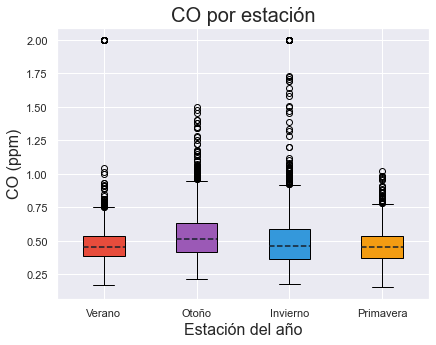

In [57]:
medianprops = dict(linestyle='--', linewidth=1.5, color='#17202A')

fig, ax = plt.subplots()

bplot= ax.boxplot([verano_promedio['CO promedio'], otono_promedio['CO promedio'], invierno_promedio['CO promedio'], primavera_promedio['CO promedio']], vert=True, patch_artist=True, labels=['Verano', 'Otoño', 'Invierno', 'Primavera'], medianprops=medianprops)
#ax.set_title('CO por estación', fontsize=20)

colors = ['#E74C3C', '#9B59B6', '#3498DB', '#F39C12']

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
plt.xlabel('Estación del año', size= 16)
plt.ylabel('CO (ppm)', size= 16)
plt.title('CO por estación', fontdict={'fontsize': 20}, loc='center')

fig.set_size_inches(6.66, 5)

plt.show()

In [58]:
### DIÓXIDO DE NITRÓGENO ###

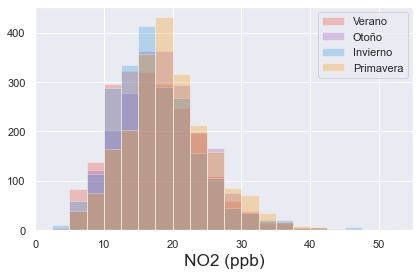

In [59]:
binsno2 = np.linspace(2.5, 52.5, num=21, dtype=list)

sns.set()
plt.hist(verano_promedio['NO2 promedio'], bins=binsno2, alpha=0.3, color='#E74C3C', label='Verano', histtype='barstacked')
plt.hist(otono_promedio['NO2 promedio'], bins=binsno2, alpha=0.3, color='#9B59B6', label='Otoño', histtype='barstacked')
plt.hist(invierno_promedio['NO2 promedio'], bins=binsno2, alpha=0.3, color='#3498DB', label='Invierno', histtype='barstacked')
plt.hist(primavera_promedio['NO2 promedio'], bins=binsno2, alpha=0.3, color='#F39C12', label='Primavera', histtype='barstacked')
plt.xlabel('NO2 (ppb)', size= 'x-large')
plt.tight_layout()
plt.legend()
plt.show()

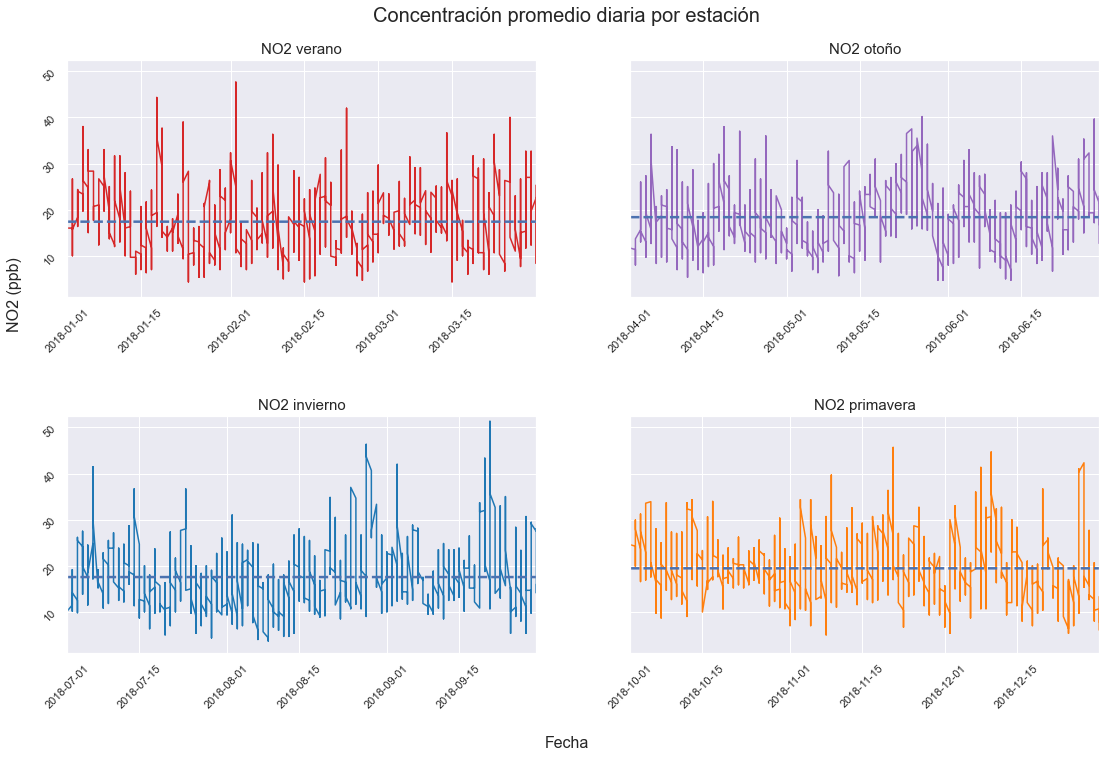

In [60]:
verano_promedio['NO2 mean'] = verano_promedio['NO2 promedio'].mean()
otono_promedio['NO2 mean'] = otono_promedio['NO2 promedio'].mean()
invierno_promedio['NO2 mean'] = invierno_promedio['NO2 promedio'].mean()
primavera_promedio['NO2 mean'] = primavera_promedio['NO2 promedio'].mean()


fig, ax = plt.subplots(2, 2, sharey=True)

data_line1 = ax[0, 0].plot(verano_promedio.index, verano_promedio['NO2 promedio'], 'tab:red')
mean_line1 = ax[0, 0].plot(verano_promedio.index, verano_promedio['NO2 mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_xlim(verano_promedio.index[0], verano_promedio.index[-1])
ax[0, 0].set_title('NO2 verano', size=15)

data_line2 = ax[0, 1].plot(otono_promedio.index, otono_promedio['NO2 promedio'], 'tab:purple')
mean_line2 = ax[0, 1].plot(otono_promedio.index, otono_promedio['NO2 mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_xlim(otono_promedio.index[0], otono_promedio.index[-1])
ax[0, 1].set_title('NO2 otoño', size=15)

data_line3 = ax[1, 0].plot(invierno_promedio.index, invierno_promedio['NO2 promedio'], 'tab:blue')
mean_line3 = ax[1, 0].plot(invierno_promedio.index, invierno_promedio['NO2 mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[1, 0].tick_params(labelrotation=45)
ax[1, 0].set_xlim(invierno_promedio.index[0], invierno_promedio.index[-1])
ax[1, 0].set_title('NO2 invierno', size=15)

data_line4 = ax[1, 1].plot(primavera_promedio.index, primavera_promedio['NO2 promedio'], 'tab:orange')
mean_line4 = ax[1, 1].plot(primavera_promedio.index, primavera_promedio['NO2 mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[1, 1].tick_params(labelrotation=45)
ax[1, 1].set_xlim(primavera_promedio.index[0], primavera_promedio.index[-1])
ax[1, 1].set_title('NO2 primavera', size=15)

fig.suptitle('Concentración promedio diaria por estación', size=20)
fig.subplots_adjust(top=0.91)
fig.text(0.5, 0, 'Fecha', ha='center', size=16)
fig.text(0.08, 0.6, 'NO2 (ppb)', va='center', rotation='vertical', size=16)

fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(hspace=0.5)

plt.ylim(bottom=1, top=52.5)
plt.show()

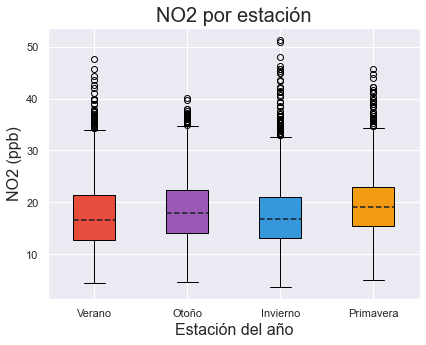

In [61]:
medianprops = dict(linestyle='--', linewidth=1.5, color='#17202A')

fig, ax = plt.subplots()

bplot= ax.boxplot([verano_promedio['NO2 promedio'], otono_promedio['NO2 promedio'], invierno_promedio['NO2 promedio'], primavera_promedio['NO2 promedio']], vert=True, patch_artist=True, labels=['Verano', 'Otoño', 'Invierno', 'Primavera'], medianprops=medianprops)
ax.set_title('NO2 por estación', fontsize=20)

colors = ['#E74C3C', '#9B59B6', '#3498DB', '#F39C12']

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.xlabel('Estación del año', size= 16)
plt.ylabel('NO2 (ppb)', size= 16)
plt.title('NO2 por estación', fontdict={'fontsize': 20}, loc='center')

fig.set_size_inches(6.66, 5)

plt.show()

In [62]:
### PM10 ###

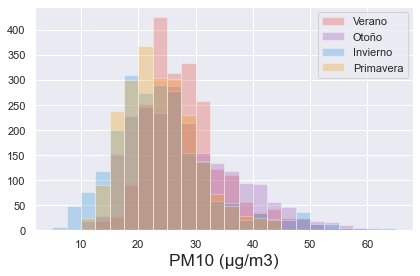

In [63]:
binspm10 = np.linspace(5, 65, num=25, dtype=list)

sns.set()
plt.hist(verano_promedio['PM10 promedio'], bins=binspm10, alpha=0.3, color='#E74C3C', label='Verano', histtype='barstacked')
plt.hist(otono_promedio['PM10 promedio'], bins=binspm10, alpha=0.3, color='#9B59B6', label='Otoño', histtype='barstacked')
plt.hist(invierno_promedio['PM10 promedio'], bins=binspm10, alpha=0.3, color='#3498DB', label='Invierno', histtype='barstacked')
plt.hist(primavera_promedio['PM10 promedio'], bins=binspm10, alpha=0.3, color='#F39C12', label='Primavera', histtype='barstacked')
plt.xlabel('PM10 (µg/m3)', size= 'x-large')
plt.tight_layout()
plt.legend()
plt.show()

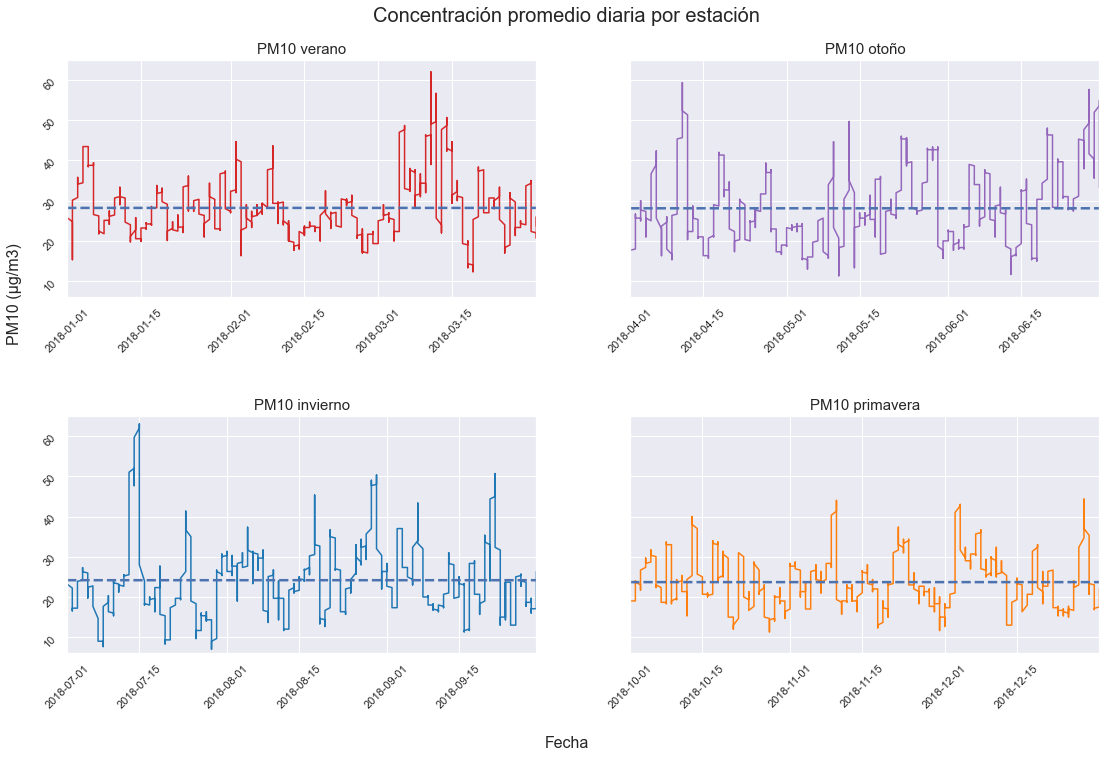

In [64]:
verano_promedio['PM10 mean'] = verano_promedio['PM10 promedio'].mean()
otono_promedio['PM10 mean'] = otono_promedio['PM10 promedio'].mean()
invierno_promedio['PM10 mean'] = invierno_promedio['PM10 promedio'].mean()
primavera_promedio['PM10 mean'] = primavera_promedio['PM10 promedio'].mean()


fig, ax = plt.subplots(2, 2, sharey=True)

data_line1 = ax[0, 0].plot(verano_promedio.index, verano_promedio['PM10 promedio'], 'tab:red')
mean_line1 = ax[0, 0].plot(verano_promedio.index, verano_promedio['PM10 mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_xlim(verano_promedio.index[0], verano_promedio.index[-1])
ax[0, 0].set_title('PM10 verano', size=15)

data_line2 = ax[0, 1].plot(otono_promedio.index, otono_promedio['PM10 promedio'], 'tab:purple')
mean_line2 = ax[0, 1].plot(otono_promedio.index, otono_promedio['PM10 mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_xlim(otono_promedio.index[0], otono_promedio.index[-1])
ax[0, 1].set_title('PM10 otoño', size=15)

data_line3 = ax[1, 0].plot(invierno_promedio.index, invierno_promedio['PM10 promedio'], 'tab:blue')
mean_line3 = ax[1, 0].plot(invierno_promedio.index, invierno_promedio['PM10 mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[1, 0].tick_params(labelrotation=45)
ax[1, 0].set_xlim(invierno_promedio.index[0], invierno_promedio.index[-1])
ax[1, 0].set_title('PM10 invierno', size=15)

data_line4 = ax[1, 1].plot(primavera_promedio.index, primavera_promedio['PM10 promedio'], 'tab:orange')
mean_line4 = ax[1, 1].plot(primavera_promedio.index, primavera_promedio['PM10 mean'], label='Mean', linestyle='--', linewidth=2.5)
ax[1, 1].tick_params(labelrotation=45)
ax[1, 1].set_xlim(primavera_promedio.index[0], primavera_promedio.index[-1])
ax[1, 1].set_title('PM10 primavera', size=15)

fig.suptitle('Concentración promedio diaria por estación', size=20)
fig.subplots_adjust(top=0.91)
fig.text(0.5, 0, 'Fecha', ha='center', size=16)
fig.text(0.08, 0.6, 'PM10 (µg/m3)', va='center', rotation='vertical', size=16)

fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(hspace=0.5)

plt.ylim(bottom=6, top=65)
plt.show()

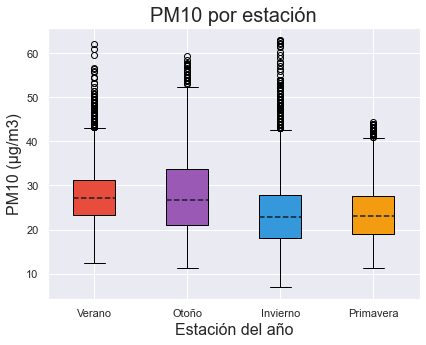

In [65]:
medianprops = dict(linestyle='--', linewidth=1.5, color='#17202A')

fig, ax = plt.subplots()

bplot= ax.boxplot([verano_promedio['PM10 promedio'], otono_promedio['PM10 promedio'], invierno_promedio['PM10 promedio'], primavera_promedio['PM10 promedio']], vert=True, patch_artist=True, labels=['Verano', 'Otoño', 'Invierno', 'Primavera'], medianprops=medianprops)

colors = ['#E74C3C', '#9B59B6', '#3498DB', '#F39C12']

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.xlabel('Estación del año', size= 16)
plt.ylabel('PM10 (µg/m3)', size= 16)
plt.title('PM10 por estación', fontdict={'fontsize': 20}, loc='center')

fig.set_size_inches(6.66, 5)

plt.show()

In [66]:
#
#ANÁLISIS POR HORA
#

In [67]:
#Primero para volver a tener el dataframe con el año completo, concatenamos los cuatro dataframes en orden

calidad_aire_promedio = pd.concat([verano_promedio, otono_promedio, invierno_promedio, primavera_promedio])
calidad_aire_promedio = calidad_aire_promedio.drop(['CO mean', 'NO2 mean', "PM10 mean"], axis=1)
calidad_aire_promedio.head(25)

,Hora,CO promedio,NO2 promedio,PM10 promedio
fecha,,,,
2018-01-01,1,0.423333,17.000000,24.000000
2018-01-01,2,0.453333,19.666667,25.666667
2018-01-01,3,0.483333,21.000000,28.333333
2018-01-01,4,0.510000,19.666667,30.000000
2018-01-01,5,0.530000,15.000000,30.333333
2018-01-01,6,0.523333,13.333333,31.333333
2018-01-01,7,0.516667,13.333333,31.333333
2018-01-01,8,0.500000,12.000000,31.333333
2018-01-01,9,0.483333,14.356469,31.333333


In [68]:
calidad_aire_promedio.tail(25)

,Hora,CO promedio,NO2 promedio,PM10 promedio
fecha,,,,
2018-12-30,24,0.450000,10.333333,17.189558
2018-12-31,1,0.456667,10.666667,17.522891
2018-12-31,2,0.453333,9.666667,17.522891
2018-12-31,3,0.440000,9.000000,17.522891
2018-12-31,4,0.420000,8.000000,17.522891
2018-12-31,5,0.400000,8.333333,17.856225
2018-12-31,6,0.380000,10.666667,18.189558
2018-12-31,7,0.366667,12.666667,18.189558
2018-12-31,8,0.366667,11.333333,18.522891


In [69]:
promedio_por_hora = calidad_aire_promedio.groupby('Hora').mean()
print(promedio_por_hora)

      CO promedio  NO2 promedio  PM10 promedio
Hora                                          
1        0.568332     17.307616      26.038546
2        0.552630     15.655648      26.032016
3        0.525060     14.165403      26.037526
4        0.494238     13.327938      26.040494
5        0.462410     13.345806      26.078864
6        0.432232     14.957735      26.077035
7        0.417273     17.323377      26.046093
8        0.420127     18.897814      26.050261
9        0.431183     19.268827      26.027360
10       0.444299     18.793453      26.018396
11       0.458047     17.859018      25.998899
12       0.474015     17.359689      26.013538
13       0.490338     17.261863      26.058339
14       0.504682     17.128884      26.065378
15       0.509210     17.402278      26.036300
16       0.503892     17.902349      26.019677
17       0.499045     19.156268      25.974639
18       0.502170     20.621895      26.052209
19       0.516773     22.083857      26.033518
20       0.53

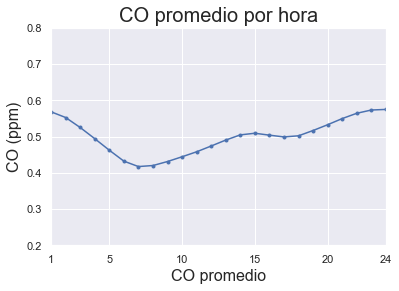

In [70]:
sns.set()
plt.plot(promedio_por_hora.index, promedio_por_hora['CO promedio'], marker='o', markersize=3)
plt.xticks(ticks=[1, 5, 10, 15, 20, 24])
plt.ylim(bottom=0.2, top=0.8)

plt.xlim(1, 24)

plt.xlabel('CO promedio', size= 16)
plt.ylabel('CO (ppm)', size= 16)
plt.title('CO promedio por hora', fontdict={'fontsize': 20}, loc='center')

fig.set_size_inches(6.66, 5)

plt.show()

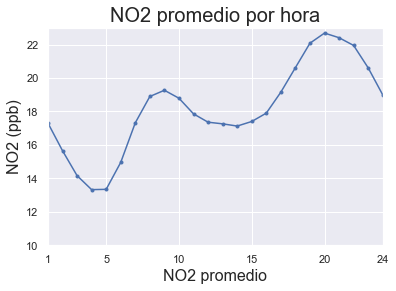

In [71]:
sns.set()
plt.plot(promedio_por_hora.index, promedio_por_hora['NO2 promedio'], marker='o', markersize=3)
plt.xticks(ticks=[1, 5, 10, 15, 20, 24])
plt.xlim(1, 24)
plt.ylim(bottom=10, top=23)

plt.xlabel('NO2 promedio', size= 16)
plt.ylabel('NO2 (ppb)', size= 16)
plt.title('NO2 promedio por hora', fontdict={'fontsize': 20}, loc='center')

plt.show()

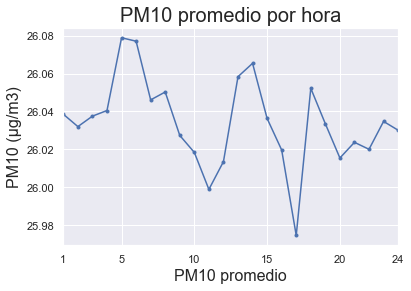

In [72]:
sns.set()
plt.plot(promedio_por_hora.index, promedio_por_hora['PM10 promedio'], marker='o', markersize=3)
plt.xticks(ticks=[1, 5, 10, 15, 20, 24])
plt.xlim(1, 24)

plt.xlabel('PM10 promedio', size= 16)
plt.ylabel('PM10 (µg/m3)', size= 16)
plt.title('PM10 promedio por hora', fontdict={'fontsize': 20}, loc='center')

plt.show()

In [73]:
calidad_aire_promedio_reindex = calidad_aire_promedio.reset_index()
calidad_aire_promedio_reindex

,fecha,Hora,CO promedio,NO2 promedio,PM10 promedio
0,2018-01-01,1,0.423333,17.000000,24.000000
1,2018-01-01,2,0.453333,19.666667,25.666667
2,2018-01-01,3,0.483333,21.000000,28.333333
3,2018-01-01,4,0.510000,19.666667,30.000000
4,2018-01-01,5,0.530000,15.000000,30.333333
...,...,...,...,...,...
8707,2018-12-31,20,0.310000,10.333333,21.189558
8708,2018-12-31,21,0.330000,12.000000,21.522891
8709,2018-12-31,22,0.353333,13.333333,22.189558
8710,2018-12-31,23,0.383333,10.333333,22.189558


In [74]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
promedio_por_dia = calidad_aire_promedio_reindex.groupby(calidad_aire_promedio_reindex['fecha'].dt.weekday_name).mean().reindex(days)
promedio_por_dia.drop('Hora', axis=1, inplace=True)
promedio_por_dia

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [ ]:
sns.set()
plt.plot(promedio_por_dia.index, promedio_por_dia['CO promedio'], marker='o', markersize=3)
plt.xticks(rotation=45)
plt.ylim(bottom=0.3, top=0.7)
plt.xlim('Monday', 'Sunday')

plt.xlabel('CO promedio por día', size= 16)
plt.ylabel('CO (ppm)', size= 16)
plt.title('CO promedio por día', fontdict={'fontsize': 20}, loc='center')

plt.show()

In [ ]:
sns.set()
plt.plot(promedio_por_dia.index, promedio_por_dia['NO2 promedio'], marker='o', markersize=3)
plt.xticks(rotation=45)
plt.ylim(bottom=14, top=21)
plt.xlim('Monday', 'Sunday')

plt.xlabel('NO2 promedio por día', size= 16)
plt.ylabel('NO2 (ppb)', size= 16)
plt.title('NO2 promedio por día', fontdict={'fontsize': 20}, loc='center')

plt.show()

In [ ]:
sns.set()
plt.plot(promedio_por_dia.index, promedio_por_dia['PM10 promedio'], marker='o', markersize=3)
plt.xticks(rotation=45)
plt.ylim(bottom=20, top=30)
plt.xlim('Monday', 'Sunday')

plt.xlabel('PM10 promedio por día', size= 16)
plt.ylabel('PM10 (µg/m3)', size= 16)
plt.title('PM10 promedio por día', fontdict={'fontsize': 20}, loc='center')

plt.show()

In [ ]:
calidad_aire_reindex = calidad_aire.reset_index()
calidad_aire_reindex

In [ ]:
dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

promedio_por_dia2 = calidad_aire_reindex.groupby(calidad_aire_reindex['fecha'].dt.weekday_name).mean().reindex(dias)
promedio_por_dia2.drop('hora', axis=1, inplace=True)
promedio_por_dia2

In [ ]:
sns.set()
plt.plot(promedio_por_dia2.index, promedio_por_dia2['co_centenario'], markersize=3, label='Centenario')
plt.plot(promedio_por_dia2.index, promedio_por_dia2['co_cordoba'], markersize=3, label='Cordoba')
plt.plot(promedio_por_dia2.index, promedio_por_dia2['co_la_boca'], markersize=3, label='La Boca')

plt.xticks(rotation=45)
plt.xlim('Monday', 'Sunday')

plt.legend()
plt.ylim(bottom=0.4, top=0.6)

plt.show()

In [ ]:
sns.set()
plt.plot(promedio_por_dia2.index, promedio_por_dia2['co_centenario'], markersize=3, label='Centenario')
plt.plot(promedio_por_dia2.index, promedio_por_dia2['co_cordoba'], markersize=3, label='Cordoba')
plt.plot(promedio_por_dia2.index, promedio_por_dia2['co_la_boca'], markersize=3, label='La Boca')

plt.xticks(rotation=45)
plt.legend()
plt.ylim(bottom=0.4, top=0.6)
plt.xlim('Monday', 'Sunday')

plt.show()